Saving train.csv to train.csv
First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        

<ipython-input-1-da4969b58255>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-da4969b58255>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

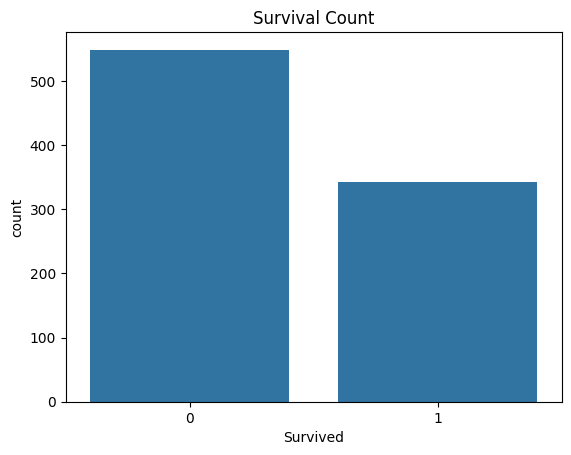

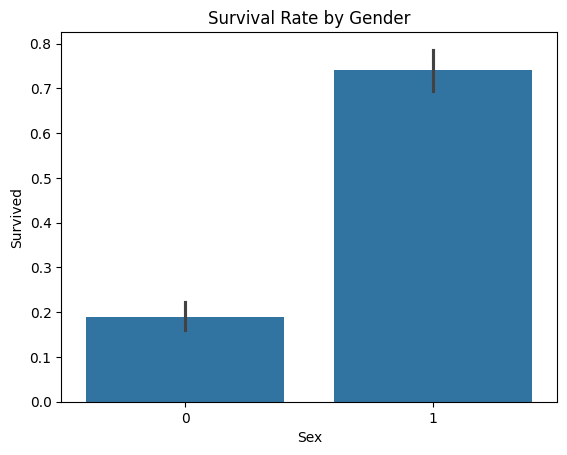

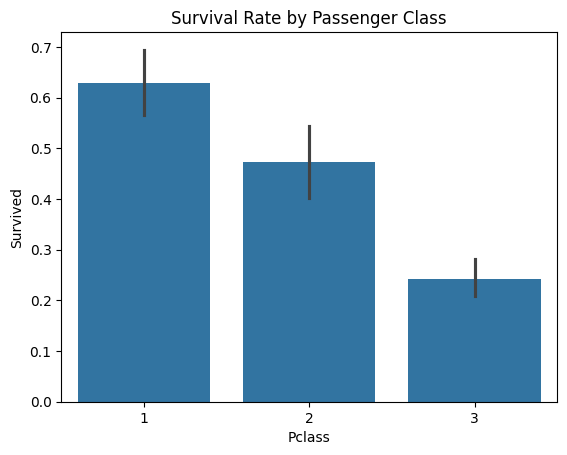

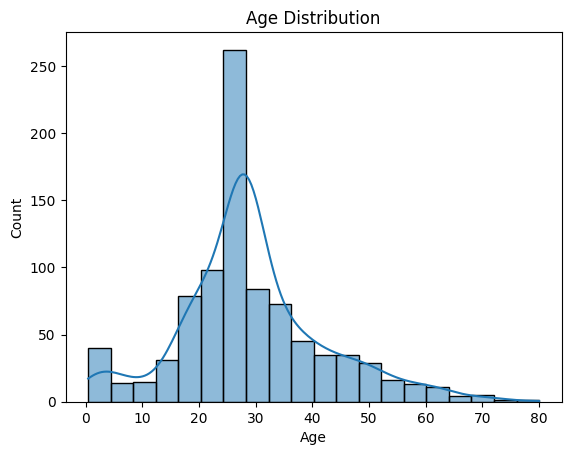

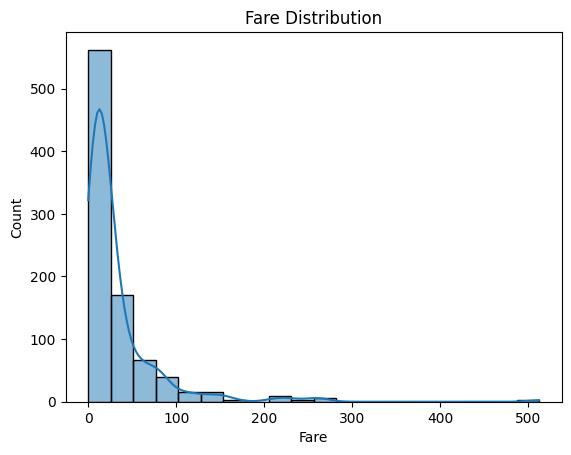

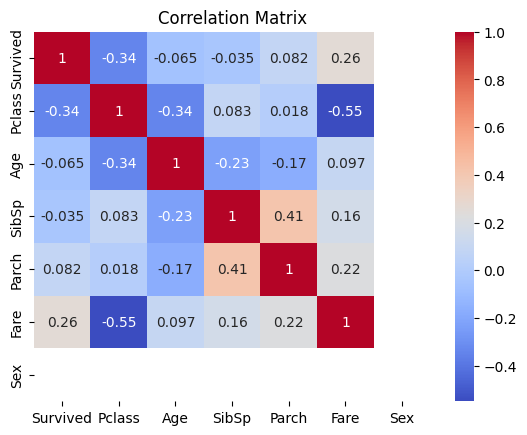

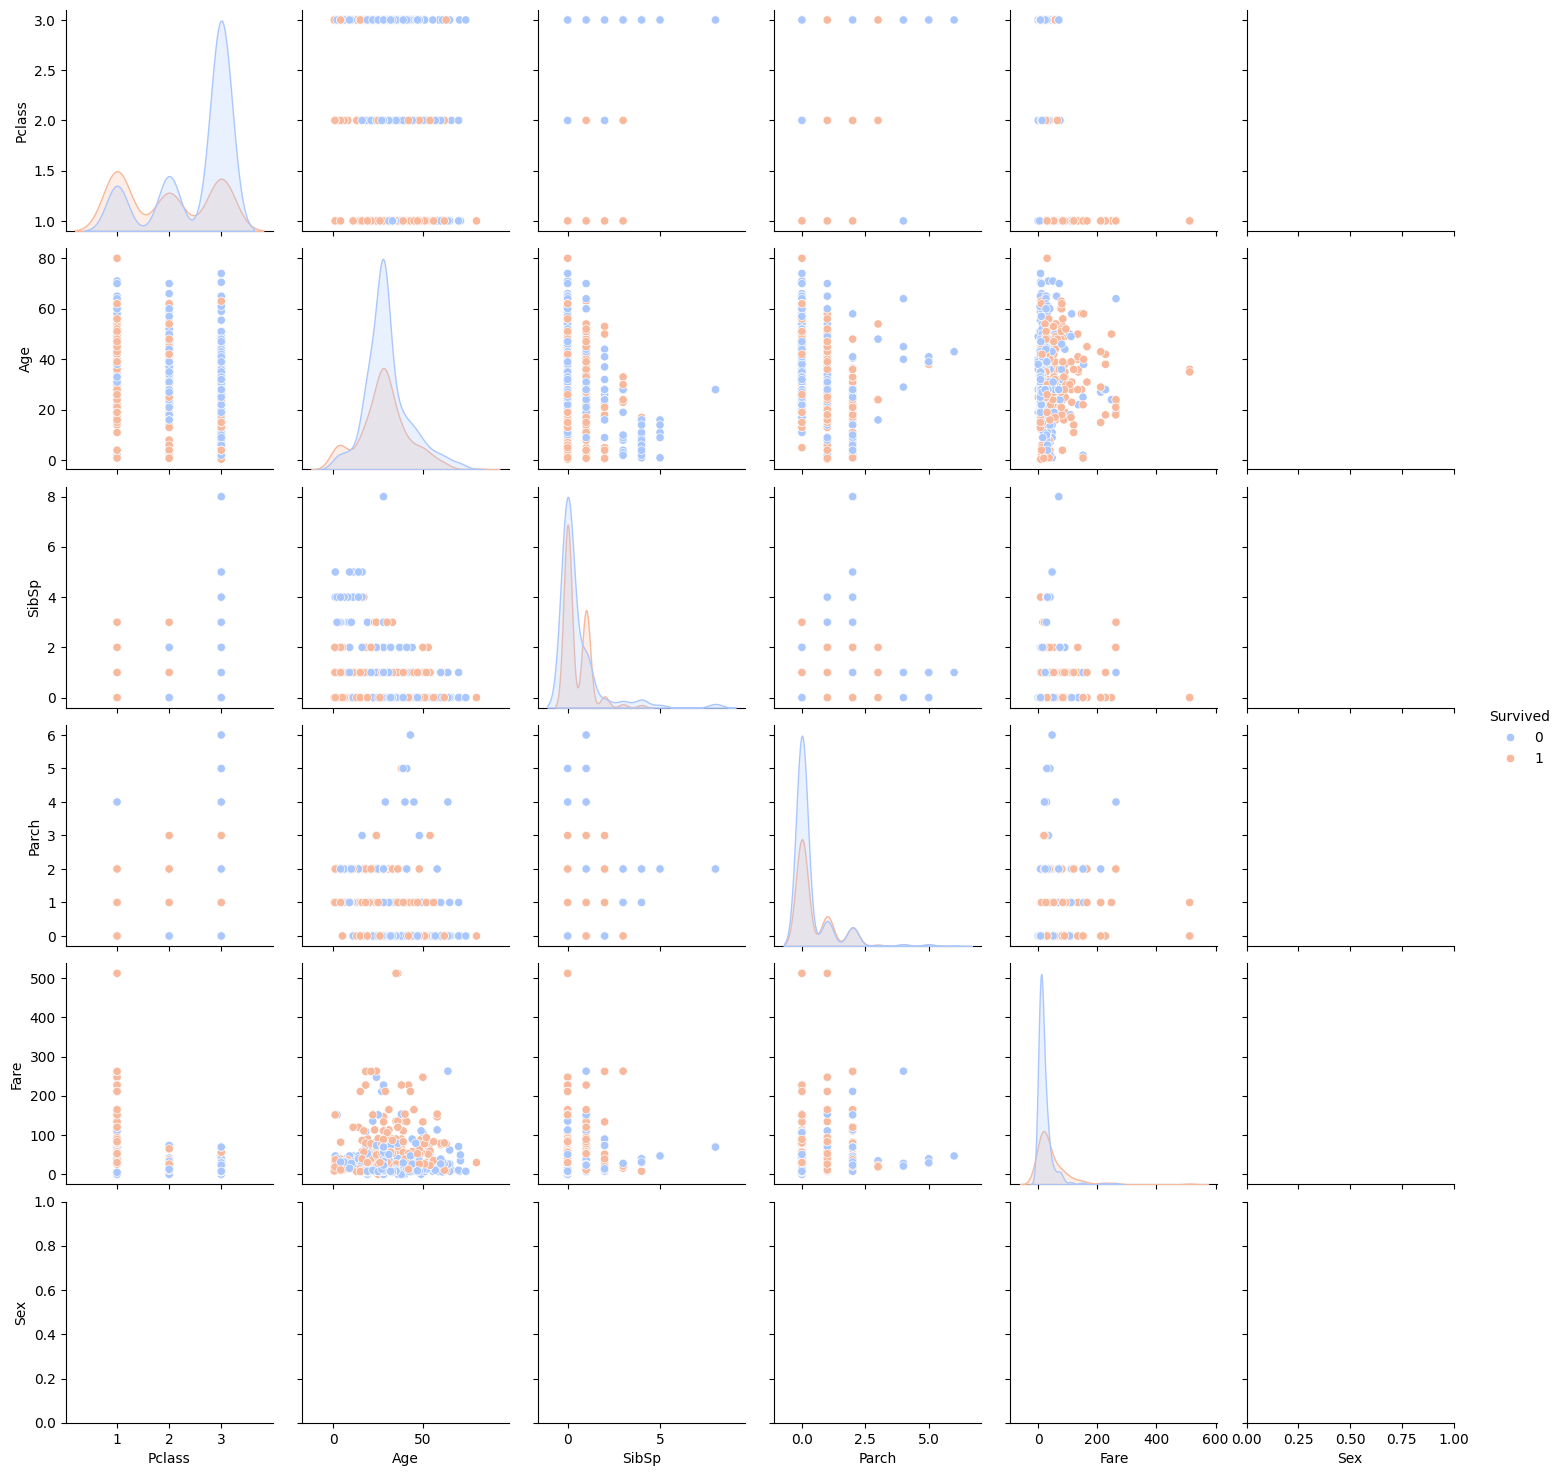

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
# Load the CSV into a DataFrame
df = pd.read_csv('train.csv')

#Data Inspection
# View the first 5 rows of the dataset
df.head()
print("First 5 rows of the dataset:")
print(df.head())
# Check data types, non-null counts, and column names
print("\nDataset information (data types, non-null counts, and column names):")
df.info()
# Get summary statistics for numerical columns
df.describe()
print("\nSummary statistics for numerical columns:")
print(df.describe())
# Count of missing values in each column
df.isnull().sum()
print("\nCount of missing values in each column:")
print(df.isnull().sum())
# Example: Check unique values in the 'Sex' column
df['Sex'].unique()
print("\nUnique values in the 'Sex' column:")
print(df['Sex'].unique())
# Example: Check unique values in the 'Embarked' column
df['Embarked'].unique()
print("\nUnique values in the 'Embarked' column:")
print(df['Embarked'].unique())

#Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Optional: Drop the 'Cabin' column

#Convert categorical data
# Encode 'Sex' as 0 and 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

#Exploratory Data Analysis (EDA)
#Visualize target variable
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()
#Analyze survival rate by categorical variables
#By gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()
#By passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

#Explore numerical distributions
#Age distribution
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()
#Fare distribution
sns.histplot(df['Fare'], kde=True, bins=20)
plt.title('Fare Distribution')
plt.show()

#Computing correlation matrix
# Ensuring 'Sex' is encoded as 0 and 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# Add relevant encoded columns to the numeric DataFrame
numeric_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
# Computing the correlation matrix
corr_matrix = numeric_df.corr()
# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Pairewise Relationships
# Selecting numerical columns and important categorical columns
relevant_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
pairplot_df = df[relevant_columns]
sns.pairplot(pairplot_df, hue='Survived', diag_kind='kde', palette='coolwarm')
plt.show()












